In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 데이터 생성
dates = pd.date_range(start="2017-01-01", periods=60, freq='M')  # 2017년 1월부터 시작하여 60개월 동안의 날짜를 생성

# 임의의 전기 사용량 생성
electricity = [
    120.5, 115.3, 130.8, 127.6, 140.1, 152.7, 160.2, 158.9, 150.3, 140.5,
    125.6, 121.9, 122.4, 116.7, 131.2, 128.5, 141.2, 154.5, 161.9, 159.7,
    152.5, 143.2, 127.2, 124.3, 123.8, 118.4, 134.1, 130.0, 142.0, 155.8,
    160.3, 157.5, 151.2, 141.9, 129.0, 127.1, 128.5, 119.0, 135.5, 132.8,
    145.6, 158.3, 163.4, 162.2, 153.0, 145.2, 132.5, 130.9, 130.1, 125.8,
    138.0, 134.5, 146.5, 160.0, 165.2, 163.9, 155.6, 147.0, 135.2, 133.5
]

df = pd.DataFrame({'Date': dates, 'Electricity': electricity})

# CSV 파일로 저장
df.to_csv('data.csv', index=False)

<Axes: >

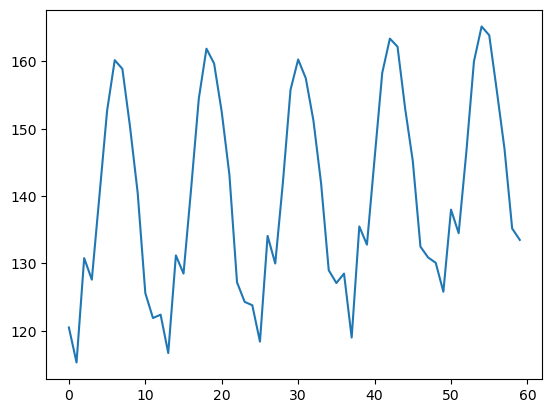

In [3]:
df['Electricity'].plot()

In [4]:
electricity_data = df['Electricity'].values

In [5]:
# 훈련, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(df['Date'], df['Electricity'], test_size= 0.2, random_state=1234)

In [10]:
mmscaler = MinMaxScaler(feature_range(0,1))

NameError: name 'feature_range' is not defined

In [11]:
import numpy as np  # 넘파이 라이브러리를 가져옴
import pandas as pd  # 판다스 라이브러리를 가져옴
from keras.models import Sequential  # Keras에서 Sequential 모델을 가져옴
from keras.layers import LSTM, Dense  # Keras에서 LSTM과 Dense 레이어를 가져옴
from sklearn.preprocessing import MinMaxScaler  # scikit-learn에서 최소-최대 정규화 도구를 가져옴
import matplotlib.pyplot as plt  # 시각화를 위한 맷플롯립 라이브러리를 가져옴

# 데이터 로드
data = pd.read_csv('data.csv', date_parser=True)  # data.csv 파일을 읽어옴
electricity_data = data['Electricity'].values.reshape(-1, 1)  # 'Electricity' 컬럼의 값을 가져와서 2차원 배열로 변환

# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))  # 0과 1 사이의 값으로 정규화하는 객체 생성
electricity_data_normalized = scaler.fit_transform(electricity_data)  # 전기 데이터를 정규화함

# 학습 데이터 생성
'''X = []
y = []
for i in range(60, len(electricity_data_normalized)):  # 과거 60일치 데이터를 기반으로 다음 날의 데이터를 예측
    X.append(electricity_data_normalized[i-60:i, 0])
    y.append(electricity_data_normalized[i, 0])
X, y = np.array(X), np.array(y)  # 리스트를 넘파이 배열로 변환'''

# 학습 데이터 생성
X = []
y = []

# 10일치 데이터를 기반으로 다음 날의 데이터를 예측
for i in range(10, len(electricity_data_normalized)):
    X.append(electricity_data_normalized[i-10:i, 0])
    y.append(electricity_data_normalized[i, 0])

X, y = np.array(X), np.array(y)

# LSTM에 입력하기 위한 데이터 형태로 변환
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # 데이터를 3차원 배열로 변환 (샘플 수, 시간 스텝, 특성 수)

In [15]:
print(X.shape[1])

10
